In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Loading dataset
soil = pd.read_csv("phds.csv")
soil.head()

,Sample No,PH,EC,N,P,K,Avg Rain,Max Temp,Min Temp,quality
0,1005,6.50,0.16,189.0,55.76,150,1009.5,36,23,7
1,1006,7.77,0.25,214.0,27.33,174,1009.5,36,23,7
2,1007,8.08,0.33,91.0,46.25,124,1009.5,36,23,7
3,1008,7.51,0.51,147.0,37.60,145,1009.5,36,23,7
4,1009,7.70,0.10,133.0,34.00,123,1009.5,36,23,7


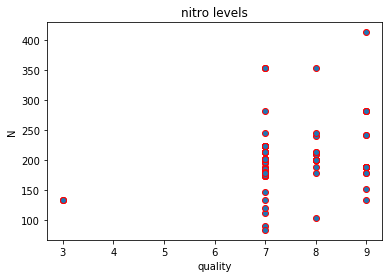

In [6]:
S = soil ['quality']
N = soil ['N']
plt.scatter(S,N,edgecolors='r')
plt.xlabel('quality')
plt.ylabel('N')
plt.title('nitro levels')
plt.show()

In [7]:
pwd

'C:\\Users\\Rishi'

In [8]:
soil.info()
soil.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
Sample No    99 non-null int64
PH           99 non-null float64
EC           99 non-null float64
N            99 non-null float64
P            99 non-null float64
K            99 non-null int64
Avg Rain     99 non-null float64
Max Temp     99 non-null int64
Min Temp     99 non-null int64
quality      99 non-null int64
dtypes: float64(5), int64(5)
memory usage: 7.8 KB


,Sample No,PH,EC,N,P,K,Avg Rain,Max Temp,Min Temp,quality
0,1005,6.50,0.16,189.0,55.76,150,1009.5,36,23,7
1,1006,7.77,0.25,214.0,27.33,174,1009.5,36,23,7
2,1007,8.08,0.33,91.0,46.25,124,1009.5,36,23,7
3,1008,7.51,0.51,147.0,37.60,145,1009.5,36,23,7
4,1009,7.70,0.10,133.0,34.00,123,1009.5,36,23,7


In [9]:
X = soil.iloc[:,:-1].values # independent variable
y = soil.iloc[:,-1].values # dependent variable

In [10]:
soil.columns

Index(['Sample No', 'PH', 'EC', 'N', 'P', 'K', 'Avg Rain', 'Max Temp',
       'Min Temp', 'quality'],
      dtype='object')

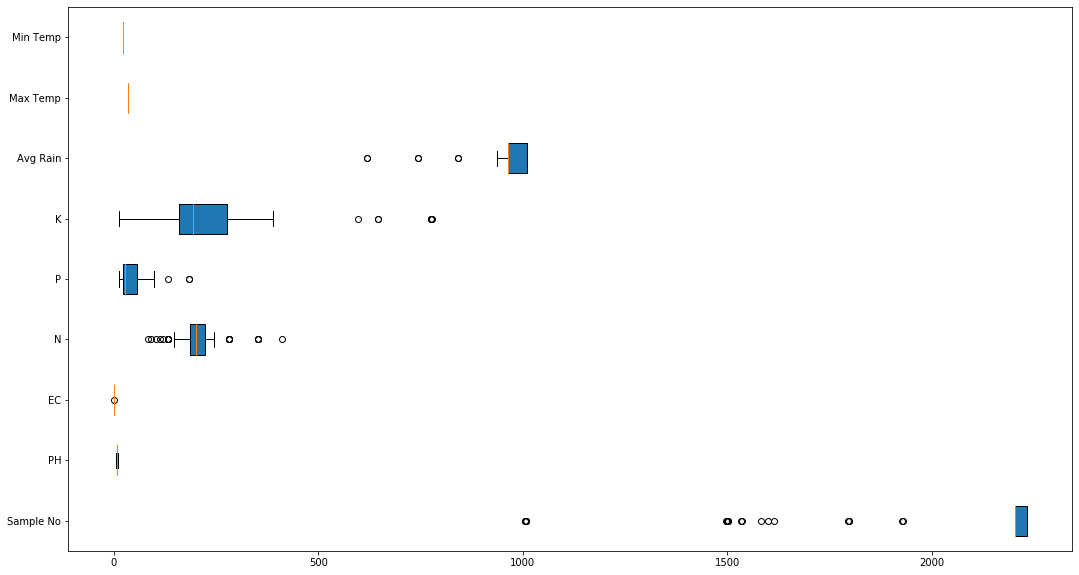

In [44]:
fig = plt.figure(figsize=(18,10))
plt.boxplot(X, vert = False,labels= [ 'Sample No','PH', 'EC','N', 'P', 'K', 'Avg Rain','Max Temp', 'Min Temp'], patch_artist=True)
plt.show()

In [14]:
corr = soil.corr()

In [15]:
import seaborn as sns

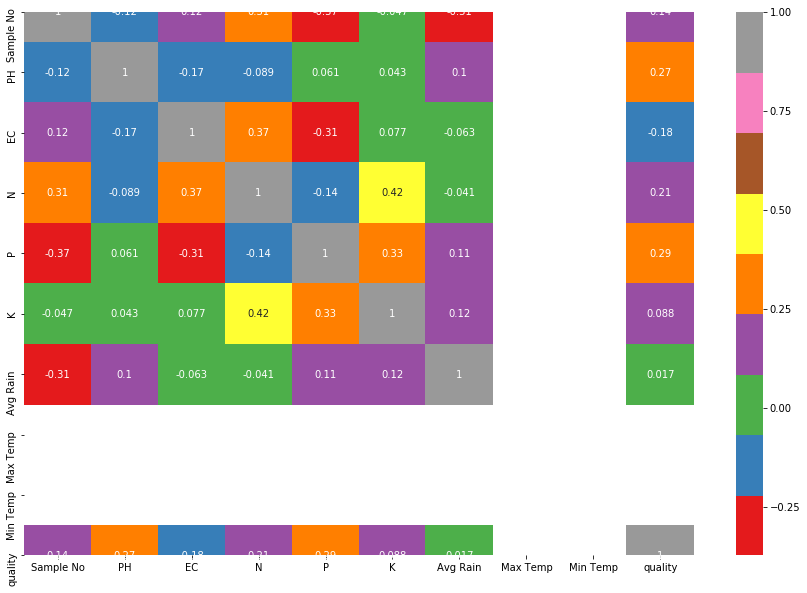

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot = True,cmap = 'Set1')

In [18]:
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
sc = MinMaxScaler(feature_range=(0,1))

In [22]:
X_new = sc.fit_transform(X)
X_new

array([[  0.00000000e+00,   3.28293737e-01,   2.03703704e-01,
          3.19634703e-01,   2.53115900e-01,   1.79084967e-01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.14995925e-04,   6.02591793e-01,   3.70370370e-01,
          3.95738204e-01,   8.75364007e-02,   2.10457516e-01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.62999185e-03,   6.69546436e-01,   5.18518519e-01,
          2.13089802e-02,   1.97728596e-01,   1.45098039e-01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.44498778e-03,   5.46436285e-01,   8.51851852e-01,
          1.91780822e-01,   1.47350029e-01,   1.72549020e-01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.25998370e-03,   5.87473002e-01,   9.25925926e-02,
          1.49162861e-01,   1.26383227e-01,   1.43790850e-01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.00977995e-01,   6.45788337e-01,   6.11111111e-01,
   

In [23]:
X_new[0]

array([ 0.        ,  0.32829374,  0.2037037 ,  0.3196347 ,  0.2531159 ,
        0.17908497,  1.        ,  0.        ,  0.        ])

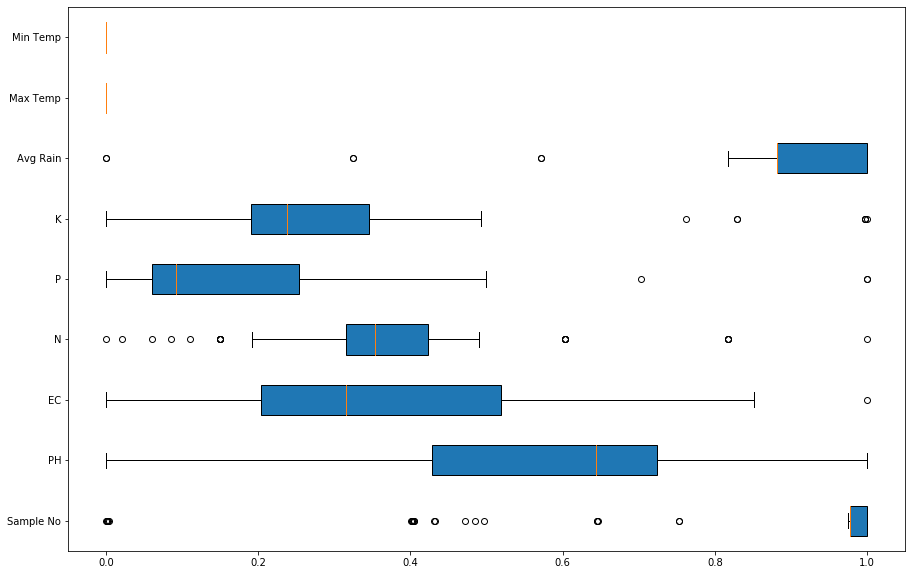

In [24]:
fig = plt.figure(figsize=(15,10))
plt.boxplot(X_new, vert = False,labels= ['Sample No','PH', 'EC','N', 'P', 'K', 'Avg Rain','Max Temp', 'Min Temp'], patch_artist=True)
plt.show()


In [26]:
mx = sc.data_max_
mn = sc.data_min_

In [27]:
np.savez('scale.npz',mn,mx)

In [28]:
print(mx)
print(mn)

[  2.23200000e+03   9.61000000e+00   5.90000000e-01   4.12500000e+02
   1.84000000e+02   7.78000000e+02   1.00950000e+03   3.60000000e+01
   2.30000000e+01]
[  1.00500000e+03   4.98000000e+00   5.00000000e-02   8.40000000e+01
   1.23000000e+01   1.30000000e+01   6.18000000e+02   3.60000000e+01
   2.30000000e+01]


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2,
random_state =0)

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((79, 9), (79,), (20, 9), (20,))

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=100)

In [33]:
model_dt.fit(x_train, y_train) # training model
model_rf.fit(x_train, y_train) # training model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
y_pred_dt = model_dt.predict(x_test) # we use this for evaluation
y_pred_rf = model_rf.predict(x_test) # we use this for evaluation

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
cm_dt = confusion_matrix(y_test, y_pred_dt) # confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf) # confusion matrix

In [39]:
cr_dt = classification_report(y_test, y_pred_dt) # classification report
cr_rf = classification_report(y_test, y_pred_rf) # classification report

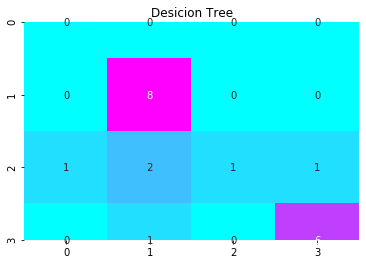

In [40]:
import seaborn as sns

sns.heatmap(cm_dt,annot=True,cbar=None,cmap = 'cool')
plt.title('Desicion Tree')
plt.show()

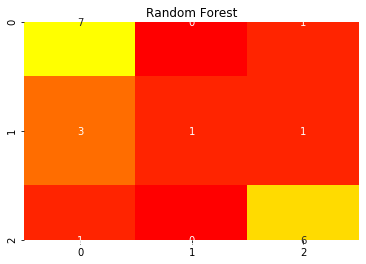

In [41]:
sns.heatmap(cm_rf,annot=True,cbar=None,cmap = 'autumn')
plt.title('Random Forest')
plt.show()

In [42]:
print('='*20+'Desicion Tree'+'='*20)
print(cr_dt)

====================Desicion Tree====================
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           7       0.73      1.00      0.84         8
           8       1.00      0.20      0.33         5
           9       0.86      0.86      0.86         7

   micro avg       0.75      0.75      0.75        20
   macro avg       0.65      0.51      0.51        20
weighted avg       0.84      0.75      0.72        20



In [43]:
print('='*20+'Random Forest'+'='*20)
print(cr_rf)

====================Random Forest====================
              precision    recall  f1-score   support

           7       0.64      0.88      0.74         8
           8       1.00      0.20      0.33         5
           9       0.75      0.86      0.80         7

   micro avg       0.70      0.70      0.70        20
   macro avg       0.80      0.64      0.62        20
weighted avg       0.77      0.70      0.66        20

